# Regressão - Steam store games

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Normalization
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Datasets
df_steam = pd.read_csv("data/steam/steam.csv")
df_support = pd.read_csv("data/steam/steam_support_info.csv")
df_description = pd.read_csv("data/steam/steam_description_data.csv")
df_requirements = pd.read_csv("data/steam/steam_requirements_data.csv")
df_tags = pd.read_csv("data/steam/steamspy_tag_data.csv")

## Análise Exploratoria / Pré-processamento

### Visualização inicial dos arquivos presentes no dataset

In [3]:
df_steam.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [4]:
df_support.head(5)

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [5]:
df_description.head(5)

# Esse conjunto de dados contém as descrições de cada jogo, essas informações não serão relevantes para a predição dos valores

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [6]:
df_requirements.head(5)

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [7]:
df_tags.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploração dos valores em df_steam

In [8]:
df_steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [9]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [10]:
# Identificando o tamanho do dataset
df_steam.shape

(27075, 18)

In [11]:
# Análise de valores duplicados
df_steam.duplicated().sum()

np.int64(0)

In [12]:
# Localização de valores nulos
df_steam.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [13]:
df_steam['categories'].value_counts()

categories
Single-player                                                                                                           6110
Single-player;Steam Achievements                                                                                        2334
Single-player;Steam Achievements;Steam Trading Cards                                                                     848
Single-player;Partial Controller Support                                                                                 804
Single-player;Steam Trading Cards                                                                                        792
                                                                                                                        ... 
Online Multi-Player;Cross-Platform Multiplayer;Steam Achievements;Steam Workshop;Stats;Includes level editor               1
Online Multi-Player;Steam Achievements;Stats                                                                      

In [14]:
df_steam['genres'].value_counts()

genres
Action;Indie                                                        1852
Casual;Indie                                                        1482
Action;Adventure;Indie                                              1229
Adventure;Indie                                                     1170
Action;Casual;Indie                                                 1004
                                                                    ... 
Casual;Free to Play;Indie;Racing;Strategy                              1
Free to Play;Indie;RPG;Early Access                                    1
Action;Adventure;Indie;Massively Multiplayer;Simulation;Strategy       1
Indie;Massively Multiplayer;Racing;Simulation                          1
Action;Adventure;Indie;Racing;RPG                                      1
Name: count, Length: 1552, dtype: int64

In [15]:
df_steam['required_age'].value_counts()

required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

In [16]:
df_steam['achievements'].value_counts()

achievements
0       11864
10        679
12        618
20        574
15        490
        ...  
196         1
4981        1
3340        1
574         1
510         1
Name: count, Length: 410, dtype: int64

In [17]:
df_steam[df_steam['achievements'] == 510]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21224,826010,JQ: chemistry,2018-04-09,1,Snkl Studio,Snkl Studio,windows,0,Single-player;Steam Achievements,Casual;Indie,Indie;Casual,510,37,13,0,0,0-20000,0.79


In [18]:
df_steam['developer'].value_counts()

developer
Choice of Games                    94
KOEI TECMO GAMES CO., LTD.         72
Ripknot Systems                    62
Laush Dmitriy Sergeevich           51
Nikita "Ghost_RUS"                 50
                                   ..
Black Element                       1
Neversoft                           1
Mark Healey                         1
Valve;Hidden Path Entertainment     1
Adept Studios GD                    1
Name: count, Length: 17112, dtype: int64

In [19]:
df_steam['publisher'].value_counts()

publisher
Big Fish Games      212
Strategy First      136
Ubisoft             111
THQ Nordic           98
Square Enix          97
                   ... 
LikeVR                1
Suspicious Ducks      1
Kaleido, Inc.         1
Dedbat Studios        1
the original air      1
Name: count, Length: 14353, dtype: int64

In [20]:
df_steam[df_steam['developer'] == 'Valve'].head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [21]:
df_steam['platforms'].value_counts()

platforms
windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

### Exploração dos valores em df_support

In [22]:
df_support.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [23]:
print(df_support.columns)

Index(['steam_appid', 'website', 'support_url', 'support_email'], dtype='object')


In [24]:
df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   steam_appid    27136 non-null  int64 
 1   website        18015 non-null  object
 2   support_url    16479 non-null  object
 3   support_email  23500 non-null  object
dtypes: int64(1), object(3)
memory usage: 848.1+ KB


### Junnção de colunas de diferentes datasets

Inicialmente iremos trazer as informações referentes ao jogos que possuem suporte.

In [25]:
df_merged = pd.merge(df_steam, df_support, left_on='appid', right_on='steam_appid', how='left')
df_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,steam_appid,website,support_url,support_email
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,124534,3339,17612,317,10000000-20000000,7.19,10.0,NaN,http://steamcommunity.com/app/10,NaN
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3318,633,277,62,5000000-10000000,3.99,NaN,NaN,NaN,NaN
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,3416,398,187,34,5000000-10000000,3.99,30.0,http://www.dayofdefeat.com/,NaN,NaN
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,1273,267,258,184,5000000-10000000,3.99,NaN,NaN,NaN,NaN
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,5250,288,624,415,5000000-10000000,3.99,50.0,NaN,https://help.steampowered.com,NaN


Juntamos todas essas colunas adicionadas em uma só, já que trazem a mesma informação de suporte ao jogo. Também retiramos as colunas originais do dataset adicionado.

In [26]:
df_merged['support'] = df_merged[['website', 'support_url', 'support_email']].notnull().any(axis=1).astype(int)
df_merged.drop(['website','support_url', 'support_email','steam_appid'], axis=1, inplace=True)
df_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,support
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,1
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,1


### Criação de coluna do ano de lançamento

In [27]:
df_merged['release_date'] = pd.to_datetime(df_merged['release_date'])
df_merged['release_year'] = df_merged['release_date'].dt.year
df_merged.drop('release_date', axis=1, inplace=True)

df_merged.head()

,appid,name,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,support,release_year
0,10,Counter-Strike,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1,2000
1,20,Team Fortress Classic,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0,1999
2,30,Day of Defeat,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,1,2003
3,40,Deathmatch Classic,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0,2001
4,50,Half-Life: Opposing Force,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,1,1999


Com a criação da coluna, será possível ver a quantidade de jogos lançados por ano

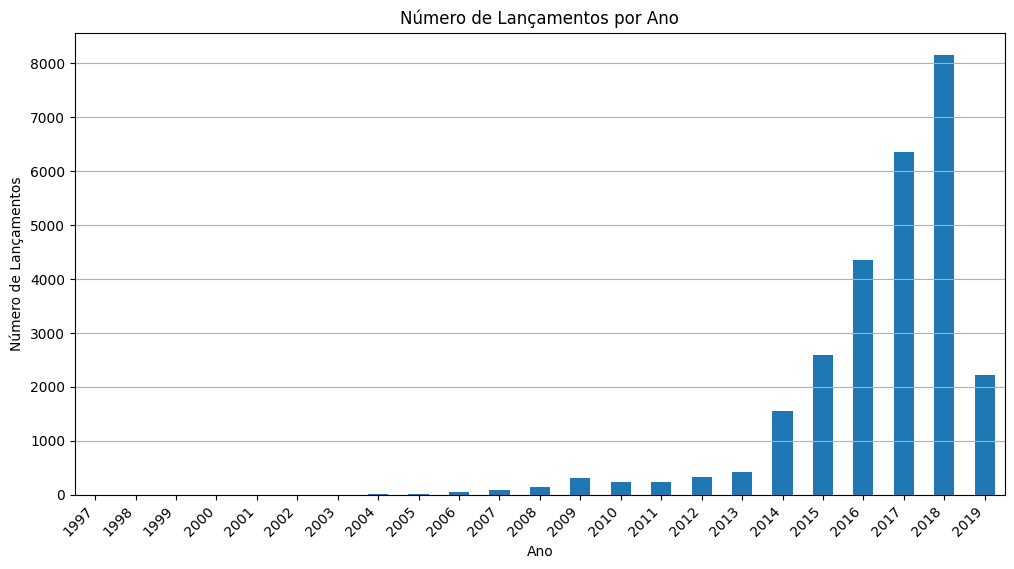

In [28]:
# Contar o número de lançamentos por ano
launches_per_year = df_merged['release_year'].value_counts().sort_index()

# Plotar

plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar')
plt.grid(axis='y')
plt.title('Número de Lançamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.xticks(rotation=45, ha='right') 
plt.show()

### One Hot Encoding com os valores de plataforma

In [29]:
# Separando as plataformas e aplicando o one-hot encoding no df_merged
df_expanded = df_merged['platforms'].str.get_dummies(sep=';')
df_merged = pd.concat([df_merged, df_expanded], axis=1)
df_merged.drop('platforms', axis=1, inplace=True)

df_merged.head()

,appid,name,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,...,negative_ratings,average_playtime,median_playtime,owners,price,support,release_year,linux,mac,windows
0,10,Counter-Strike,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,...,3339,17612,317,10000000-20000000,7.19,1,2000,1,1,1
1,20,Team Fortress Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,...,633,277,62,5000000-10000000,3.99,0,1999,1,1,1
2,30,Day of Defeat,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,...,398,187,34,5000000-10000000,3.99,1,2003,1,1,1
3,40,Deathmatch Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,...,267,258,184,5000000-10000000,3.99,0,2001,1,1,1
4,50,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,...,288,624,415,5000000-10000000,3.99,1,1999,1,1,1


Com essa separação dos valores, será possível visualizar a quantidade de jogos que existem para cada plataforma

In [30]:
df_merged['windows'].value_counts()

windows
1    27070
0        5
Name: count, dtype: int64

In [31]:
df_merged['linux'].value_counts()

linux
0    21840
1     5235
Name: count, dtype: int64

In [32]:
df_merged['mac'].value_counts()

mac
0    19009
1     8066
Name: count, dtype: int64

### Remoção de colunas com valores parecidos e valores que não serão mais utilizados

Iremos remover a coluna 'steamspy_tags' que contém as informações de genero do jogo, porém já existe uma coluna que contém essas informações, a 'genres'.

Além disso, iremos remover a coluna 'appid' já que contém um ids para os jogos. Ela auxiliou anteriormente com a junção de outros datasets, mas no momento não terá mais utilidade.

In [33]:
df_merged = df_merged.drop(['appid', 'steamspy_tags'], axis = 1)
df_merged.head()

,name,english,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,support,release_year,linux,mac,windows
0,Counter-Strike,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19,1,2000,1,1,1
1,Team Fortress Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99,0,1999,1,1,1
2,Day of Defeat,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99,1,2003,1,1,1
3,Deathmatch Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99,0,2001,1,1,1
4,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99,1,1999,1,1,1


### Redução da quantidade de valores presentes na coluna genero

Estamos considereando que o primeiro valor apresentado para os casos que possuem mais de um genero seja o mais importante

In [34]:
split_genres = df_merged["genres"].str.split(";", n=2, expand=True)
df_merged["genres"] = split_genres[0]
df_merged

,name,english,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,support,release_year,linux,mac,windows
0,Counter-Strike,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19,1,2000,1,1,1
1,Team Fortress Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99,0,1999,1,1,1
2,Day of Defeat,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99,1,2003,1,1,1
3,Deathmatch Classic,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99,0,2001,1,1,1
4,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99,1,1999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,1,SHEN JIAWEI,SHEN JIAWEI,0,Single-player;Steam Achievements,Adventure,7,3,0,0,0,0-20000,2.09,1,2019,0,0,1
27071,Cyber Gun,1,Semyon Maximov,BekkerDev Studio,0,Single-player,Action,0,8,1,0,0,0-20000,1.69,1,2019,0,0,1
27072,Super Star Blast,1,EntwicklerX,EntwicklerX,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action,24,0,1,0,0,0-20000,3.99,1,2019,0,0,1
27073,New Yankee 7: Deer Hunters,1,Yustas Game Studio,Alawar Entertainment,0,Single-player;Steam Cloud,Adventure,0,2,0,0,0,0-20000,5.19,1,2019,0,1,1


In [35]:
df_merged["genres"].value_counts()

genres
Action                   11212
Adventure                 5256
Casual                    4373
Indie                     2623
Violent                    709
Simulation                 631
Strategy                   532
RPG                        407
Free to Play               395
Sexual Content             245
Racing                     197
Nudity                     112
Sports                      83
Gore                        81
Animation & Modeling        66
Utilities                   60
Design & Illustration       28
Massively Multiplayer       16
Audio Production            16
Education                   14
Early Access                 9
Video Production             5
Accounting                   2
Web Publishing               1
Photo Editing                1
Software Training            1
Name: count, dtype: int64

In [36]:
# Criar um dicionário de mapeamento para os gêneros
genre_mapping = {
    'Action': 1, 'Adventure': 2, 'Casual': 3, 'Indie': 4, 'Violent': 5,
    'Simulation': 6, 'Strategy': 7, 'RPG': 8, 'Free to Play': 9,
    'Sexual Content': 10, 'Racing': 11, 'Nudity': 12, 'Sports': 13,
    'Gore': 14, 'Animation & Modeling': 15, 'Utilities': 16,
    'Design & Illustration': 17, 'Massively Multiplayer': 18,
    'Audio Production': 19, 'Education': 20, 'Early Access': 21,
    'Video Production': 22, 'Accounting': 23, 'Web Publishing': 24,
    'Photo Editing': 25, 'Software Training': 26
}

# Aplicar o mapeamento à coluna 'genres'
df_merged['genres_numeric'] = df_merged['genres'].map(genre_mapping)

# Exibir as primeiras linhas do DataFrame atualizado
df_merged["genres_numeric"].value_counts()

genres_numeric
1     11212
2      5256
3      4373
4      2623
5       709
6       631
7       532
8       407
9       395
10      245
11      197
12      112
13       83
14       81
15       66
16       60
17       28
18       16
19       16
20       14
21        9
22        5
23        2
24        1
25        1
26        1
Name: count, dtype: int64

In [37]:
# Separar os gêneros em linhas diferentes
df_exploded = df_merged['genres'].str.get_dummies(sep=';').sum().sort_values(ascending=False)

C:\Users\plisb\AppData\Local\Temp\ipykernel_18884\1569025136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_exploded.head(5).index, y=df_exploded.head(5).values, palette="viridis")


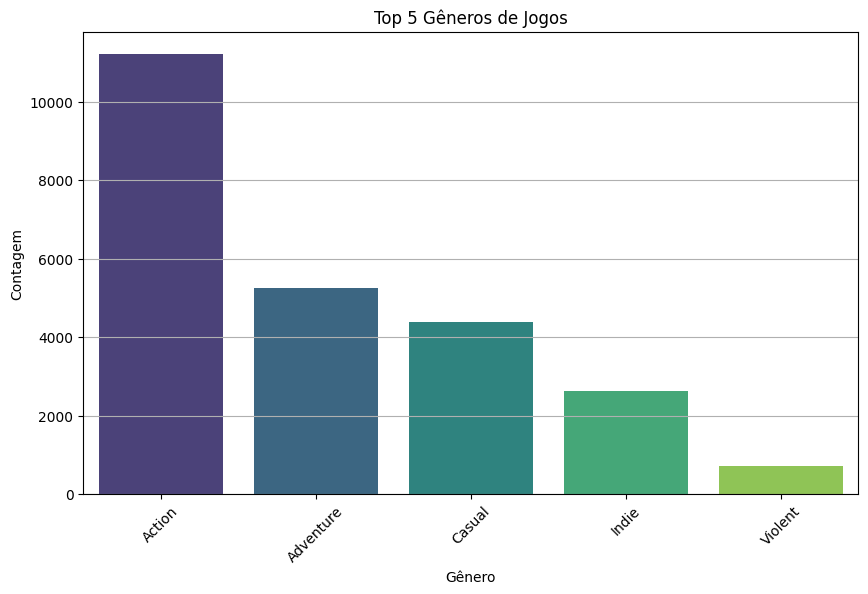

In [38]:
# Plotar os 5 gêneros mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=df_exploded.head(5).index, y=df_exploded.head(5).values, palette="viridis")
plt.title('Top 5 Gêneros de Jogos')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Redução da quantidade de valores presentes na coluna categories

In [39]:
df_merged['categories'].value_counts()

categories
Single-player                                                                                                           6110
Single-player;Steam Achievements                                                                                        2334
Single-player;Steam Achievements;Steam Trading Cards                                                                     848
Single-player;Partial Controller Support                                                                                 804
Single-player;Steam Trading Cards                                                                                        792
                                                                                                                        ... 
Online Multi-Player;Cross-Platform Multiplayer;Steam Achievements;Steam Workshop;Stats;Includes level editor               1
Online Multi-Player;Steam Achievements;Stats                                                                      

In [40]:
df_merged['categories'] = df_merged['categories'].apply(
    lambda x: 'Multi-player' if 'Multi-player' in x else 'Single-player'
)

In [41]:
# Exibir a contagem de valores na nova coluna
df_merged['categories'].value_counts()

categories
Single-player    23101
Multi-player      3974
Name: count, dtype: int64

In [42]:
# Criar as colunas binárias 'is_multi_player' e 'is_single_player'
df_merged['is_multi_player'] = df_merged['categories'].apply(lambda x: 1 if x == 'Multi-player' else 0)
df_merged['is_single_player'] = df_merged['categories'].apply(lambda x: 1 if x == 'Single-player' else 0)

In [43]:
# Exibir o DataFrame atualizado
df_merged[['categories', 'is_multi_player', 'is_single_player']].head()

,categories,is_multi_player,is_single_player
0,Multi-player,1,0
1,Multi-player,1,0
2,Multi-player,1,0
3,Multi-player,1,0
4,Multi-player,1,0


In [44]:
df_merged.head()

,name,english,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,...,owners,price,support,release_year,linux,mac,windows,genres_numeric,is_multi_player,is_single_player
0,Counter-Strike,1,Valve,Valve,0,Multi-player,Action,0,124534,3339,...,10000000-20000000,7.19,1,2000,1,1,1,1,1,0
1,Team Fortress Classic,1,Valve,Valve,0,Multi-player,Action,0,3318,633,...,5000000-10000000,3.99,0,1999,1,1,1,1,1,0
2,Day of Defeat,1,Valve,Valve,0,Multi-player,Action,0,3416,398,...,5000000-10000000,3.99,1,2003,1,1,1,1,1,0
3,Deathmatch Classic,1,Valve,Valve,0,Multi-player,Action,0,1273,267,...,5000000-10000000,3.99,0,2001,1,1,1,1,1,0
4,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Multi-player,Action,0,5250,288,...,5000000-10000000,3.99,1,1999,1,1,1,1,1,0


### Corelação entre os valores

In [45]:
#Colunas numéricas
numeric_cols = ['required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 
                'price', 'support', 'release_year', 'linux', 'mac', 'windows', 'is_multi_player', 'is_single_player', 'genres_numeric']

In [46]:
# Filtrando apenas as colunas numéricas no dataframe
df_numeric = df_merged[numeric_cols]

In [47]:
# Gerar a matriz de correlação
corr_matrix = df_numeric.corr()

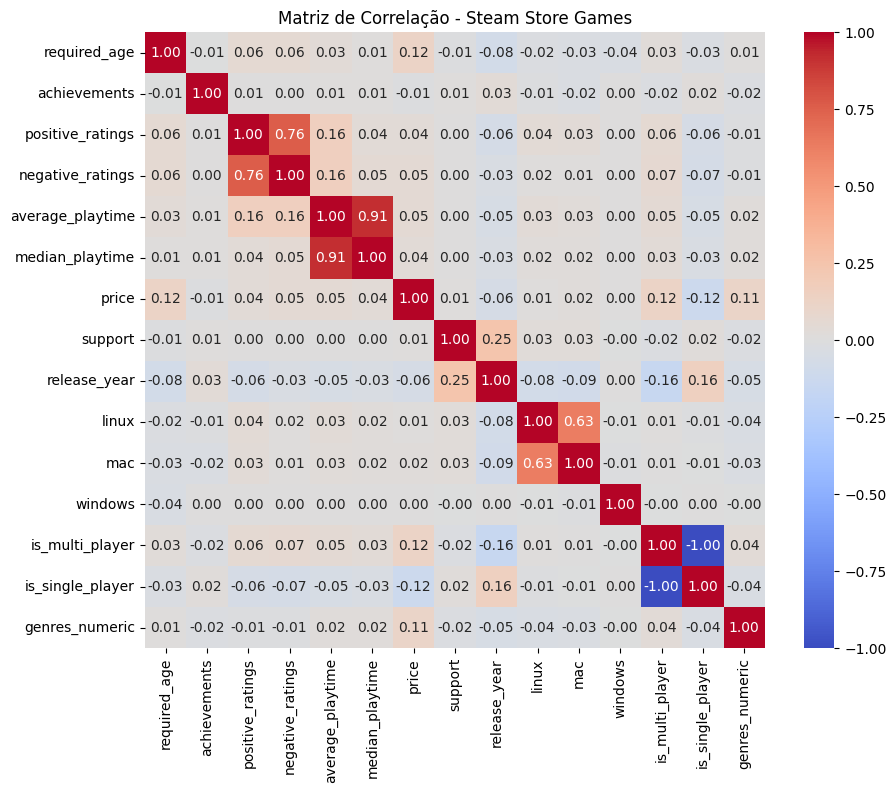

In [48]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Steam Store Games')
plt.show()

## Modelos de Regressão

Seleção dos dados a serem utilizados no processo

In [ ]:
# Selecionar características e o alvo
X = df_merged[['average_playtime', 'required_age', 'positive_ratings', 'negative_ratings','median_playtime', 'support', 'release_year', 'linux', 'mac', 'windows',
       'genres_numeric', 'is_multi_player', 'is_single_player']]
y = df_merged['price']

Divisão dos dados para treino e teste

In [ ]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalização dos dados

In [ ]:
# Normalização dos dados

normalizer = Normalization()
normalizer.adapt(X_train.to_numpy())

### Regressão Linear

In [50]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_predict = lr.predict(X_test)
y_predict

array([5.89709523, 6.93312414, 5.57417916, ..., 7.23875598, 5.37073013,
       5.03353424])

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.summary()

In [53]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [54]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split = 0.2)

Epoch 1/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.4016 - val_loss: 4.2241
Epoch 2/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2307 - val_loss: 4.2001
Epoch 3/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1924 - val_loss: 4.1957
Epoch 4/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2499 - val_loss: 4.2760
Epoch 5/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2066 - val_loss: 4.1993
Epoch 6/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1685 - val_loss: 4.2148
Epoch 7/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1934 - val_loss: 4.2372
Epoch 8/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2332 - val_loss: 4.2542
Epoch 9/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1678 - val_loss: 4.1648
Epoch 10/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2082 - val_loss: 4.2501


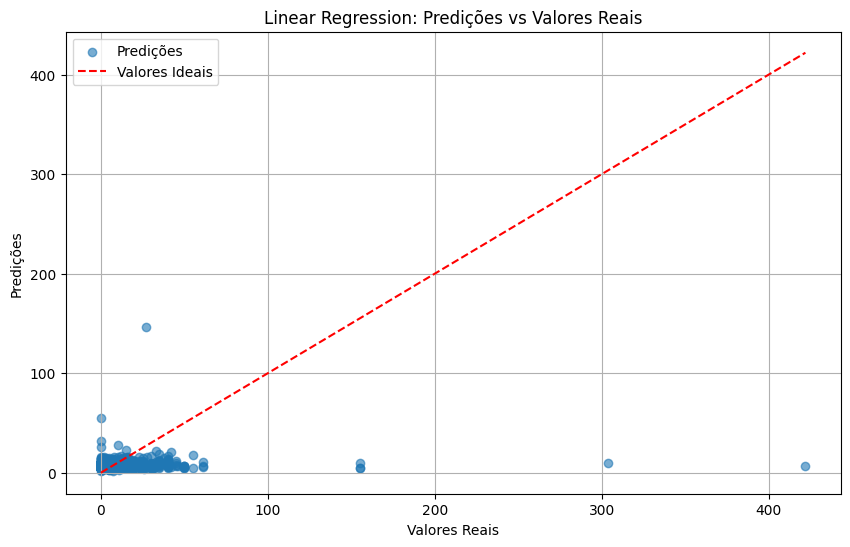

In [55]:
# Comparação entre predições e valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.6, label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Valores Ideais')
plt.title('Linear Regression: Predições vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

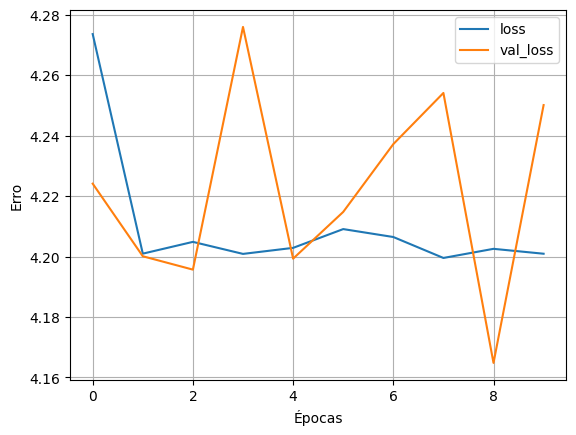

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)

In [57]:
# Avalie o modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE:  129.7218791559041
R2:  -0.26318090116088655


### Árvore de Decisão

AJUSTAR

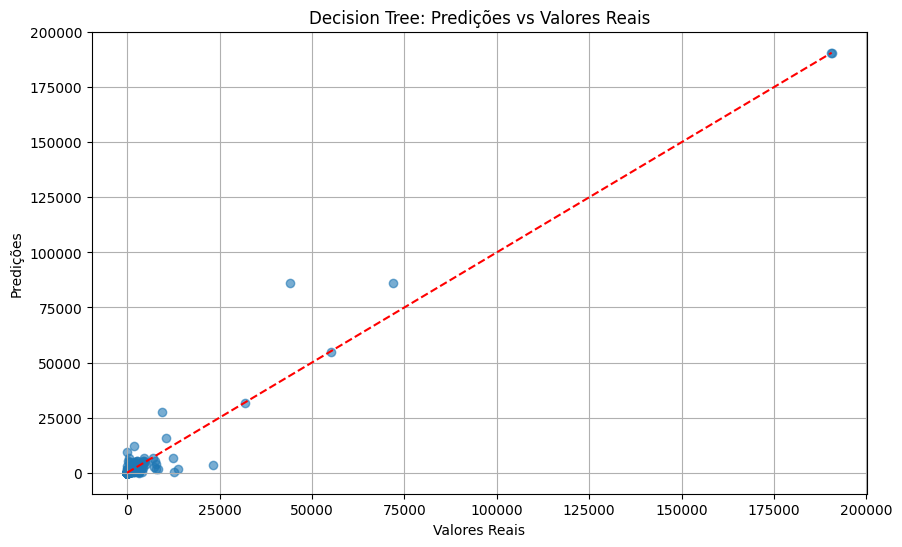

In [ ]:
# Treinando o modelo Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Fazendo as predições
y_pred_dt = dt_model.predict(X_test)

# Comparação entre predições e valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Decision Tree: Predições vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.grid()
plt.show()

### Redes Neurais

AJUSTAR

In [ ]:
# Normalizar os dados para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Aleatorização dos dados
np.random.seed(1)

tf.random.set_seed(1)

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
# Criar a rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim = 13,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # Camada oculta com 64 neurônios
    tf.keras.layers.Dense(32, activation='relu'),              # Outra camada oculta com 32 neurônios
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')                                   # Camada de saída para regressão
])

c:\Users\plisb\Desktop\Estudos\Facens\8ºSemestre\Reconhecimento de padrões\RecPad__env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, validation_split=0.2, verbose=1)

In [72]:
# Avaliar o modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Erro quadrático médio no conjunto de teste: {loss}')

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.4271
Erro quadrático médio no conjunto de teste: 97.50110626220703
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


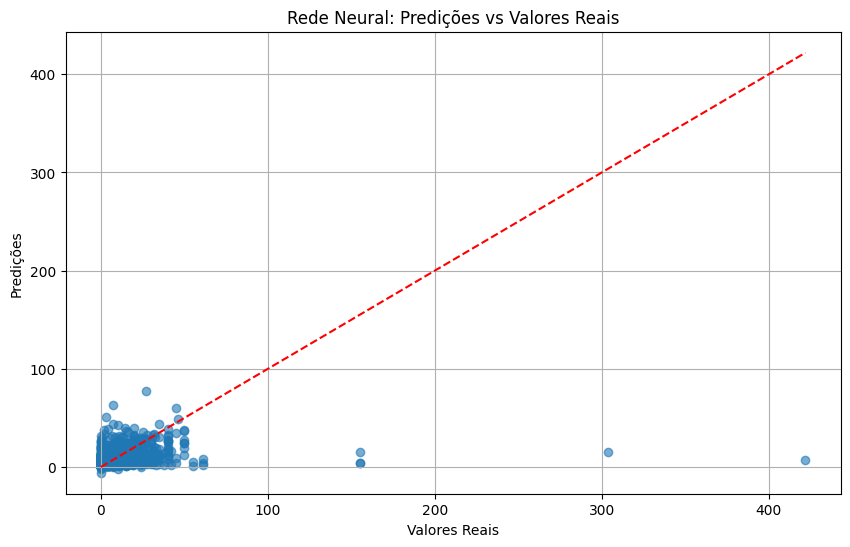

In [73]:
# Criar um DataFrame para visualizar as previsões ao lado dos valores verdadeiros
predictions_df = pd.DataFrame({'Valor Verdadeiro': y_test.values, 'Valor Predito': y_pred.flatten()})

# Comparação entre predições e valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Rede Neural: Predições vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.grid()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)